<a href="https://colab.research.google.com/github/bingsen-wang/Electric-Machines/blob/main/RotatingWaves3Phase12Pole_Polar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Rotating Wave for 3-Phase 12-Pole in Polar Coordinates</h1></b>

Dr. Bingsen Wang

11/16/2024
</center>

#Python Code


0
0
200
400
600
800
1000
0


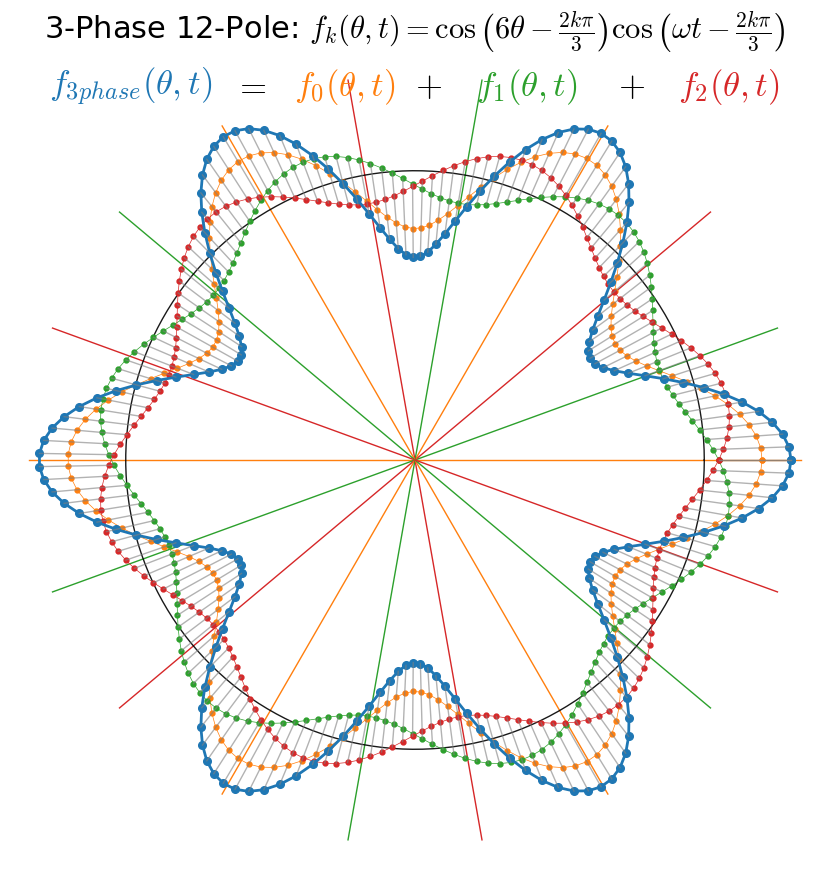

In [26]:
import numpy as np
from matplotlib import animation,pyplot,cm
pyplot.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',
                     'mathtext.fontset':'cm'})
def f(k,theta,wt):
  return np.cos(theta-2/3*np.pi*k)*np.cos(wt-2/3*np.pi*k)

Nf,Ntheta,p = 200,180,6 #p: number of pole-pairs
r0,rmax = 1.5,2
theta,t = np.linspace(0,2*np.pi,Ntheta),np.linspace(0,1,Nf)
clst = list(cm.tab10.colors)#colors of lines
fig = pyplot.figure(figsize=([9,9]))
ax0 = fig.add_axes((.05,0,.9,.9),projection='polar')
ax1 = fig.add_axes((.05,0,.9,.9),xlim=[-2,2], ylim=[-2,2],fc='none')
ax0.set_rmax(rmax)
[ax.axis('off') for ax in [ax0,ax1]]
ax1.set_title(r'3-Phase 12-Pole: $f_k(\theta,t)=\cos\left(6\theta-\frac{2k\pi}{3}\right) \cos\left(\omega t -\frac{2k\pi}{3}\right)$',size=22)
ax1.text(-1,1.8,r'$f_{3phase}(\theta,t)$',color=clst[0],size=25,ha='right')
ax1.text(-.9,1.8,r'$=$',size=25)
ax1.text(-.6,1.8,r'$f_0(\theta,t)$',color=clst[1],size=25)
ax1.text(0,1.8,r'$+$',size=25)
ax1.text(.3,1.8,r'$f_1(\theta,t)$',color=clst[2],size=25)
ax1.text(1,1.8,r'$+$',size=25)
ax1.text(1.3,1.8,r'$f_2(\theta,t)$',color=clst[3],size=25)

[ax0.plot([i*np.pi*2/3/p,i*np.pi*2/3/p],[0,rmax],c=clst[1+i%3],lw=1) for i in range(3*p)]
ax0.plot(theta,r0+theta*0,'-k',lw=1,alpha=.9)
lines=[ax0.plot([],[],'-o',color=clst[i+1],markersize=3.5,lw=.5)[0] for i in range(3)]
lines.insert(0,ax0.plot([],[],'-o',color=clst[0],markersize=5.5,lw=2)[0])
lines_v = [ax0.plot([],[],'-',c='.5',lw=1,alpha=.6)[0] for i in range(Ntheta)]

def animate(ii):
  i=ii%Nf
  if i==0: print(ii) #for monitoring
  f012 = [f(k,p*theta,t[i]*2*np.pi) for k in range(3)]
  f3phase = np.array(f012[0]+f012[1]+f012[2])
  [lines[k+1].set_data(theta,f012[k]*.3+r0) for k in range(3)]
  [lines_v[k].set_data([theta[k],theta[k]], [min(f012[0][k],f012[1][k],f012[2][k],f3phase[k])*.3+r0,
    max(f012[0][k],f012[1][k],f012[2][k],f3phase[k])*.3+r0]) for k in range(Ntheta)]
  lines[0].set_data(theta,f3phase*.3+r0)
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf*p, interval=50)
# anim
anim.save("RotatingWave3Phase12Pole_Polar.mp4", writer=animation.FFMpegWriter(fps=50), dpi = 200)